We will be predicting the selling price of cars by training a regression model on Vehicle dataset from cardekho.com

First we import the important libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

In [2]:
import os
print(os.listdir("../data")) #find name of daata file

['car_data.csv', 'housing_ext.csv']


# Data analysis
## Load the data

In [3]:
data = pd.read_csv("../data/car_data.csv")
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


as we can see, 
we have to predict Selling_Price from other given features, but som features are of non-integral type which we will deal with later

## check for NaN values

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [5]:
data.isna().any()

Car_Name         False
Year             False
Selling_Price    False
Present_Price    False
Kms_Driven       False
Fuel_Type        False
Seller_Type      False
Transmission     False
Owner            False
dtype: bool

## Features with object type values

First see the count of the value types in features having object type values

In [6]:
print(data.Car_Name.value_counts())

city                  26
corolla altis         16
verna                 14
fortuner              11
brio                  10
                      ..
Hero  Ignitor Disc     1
Bajaj  ct 100          1
vitara brezza          1
Hyosung GT250R         1
alto 800               1
Name: Car_Name, Length: 98, dtype: int64


as we see the cars are of 98 types and also cars SP will not be dependent on its name as it is an individual preference so we will drop the car names from our training data while training

In [7]:
print(data.Fuel_Type.value_counts())
print(data.Seller_Type.value_counts())
print(data.Transmission.value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


Now we will change these object values to numerical values to make it proper for Our Linear regression model

In [8]:
data.Fuel_Type.replace(regex={"Petrol":"0", "Diesel":"1","CNG":"2"}, inplace=True)
data.Seller_Type.replace(regex={"Dealer":"0","Individual":"1"},inplace=True)
data.Transmission.replace(regex={"Manual":"0","Automatic":"1"},inplace=True)
data[["Fuel_Type","Seller_Type","Transmission"]]=data[["Fuel_Type","Seller_Type","Transmission"]].astype(int)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    int32  
 6   Seller_Type    301 non-null    int32  
 7   Transmission   301 non-null    int32  
 8   Owner          301 non-null    int64  
dtypes: float64(2), int32(3), int64(3), object(1)
memory usage: 17.8+ KB


## Exploratory data analysis(EDA)

lets see some data distributions

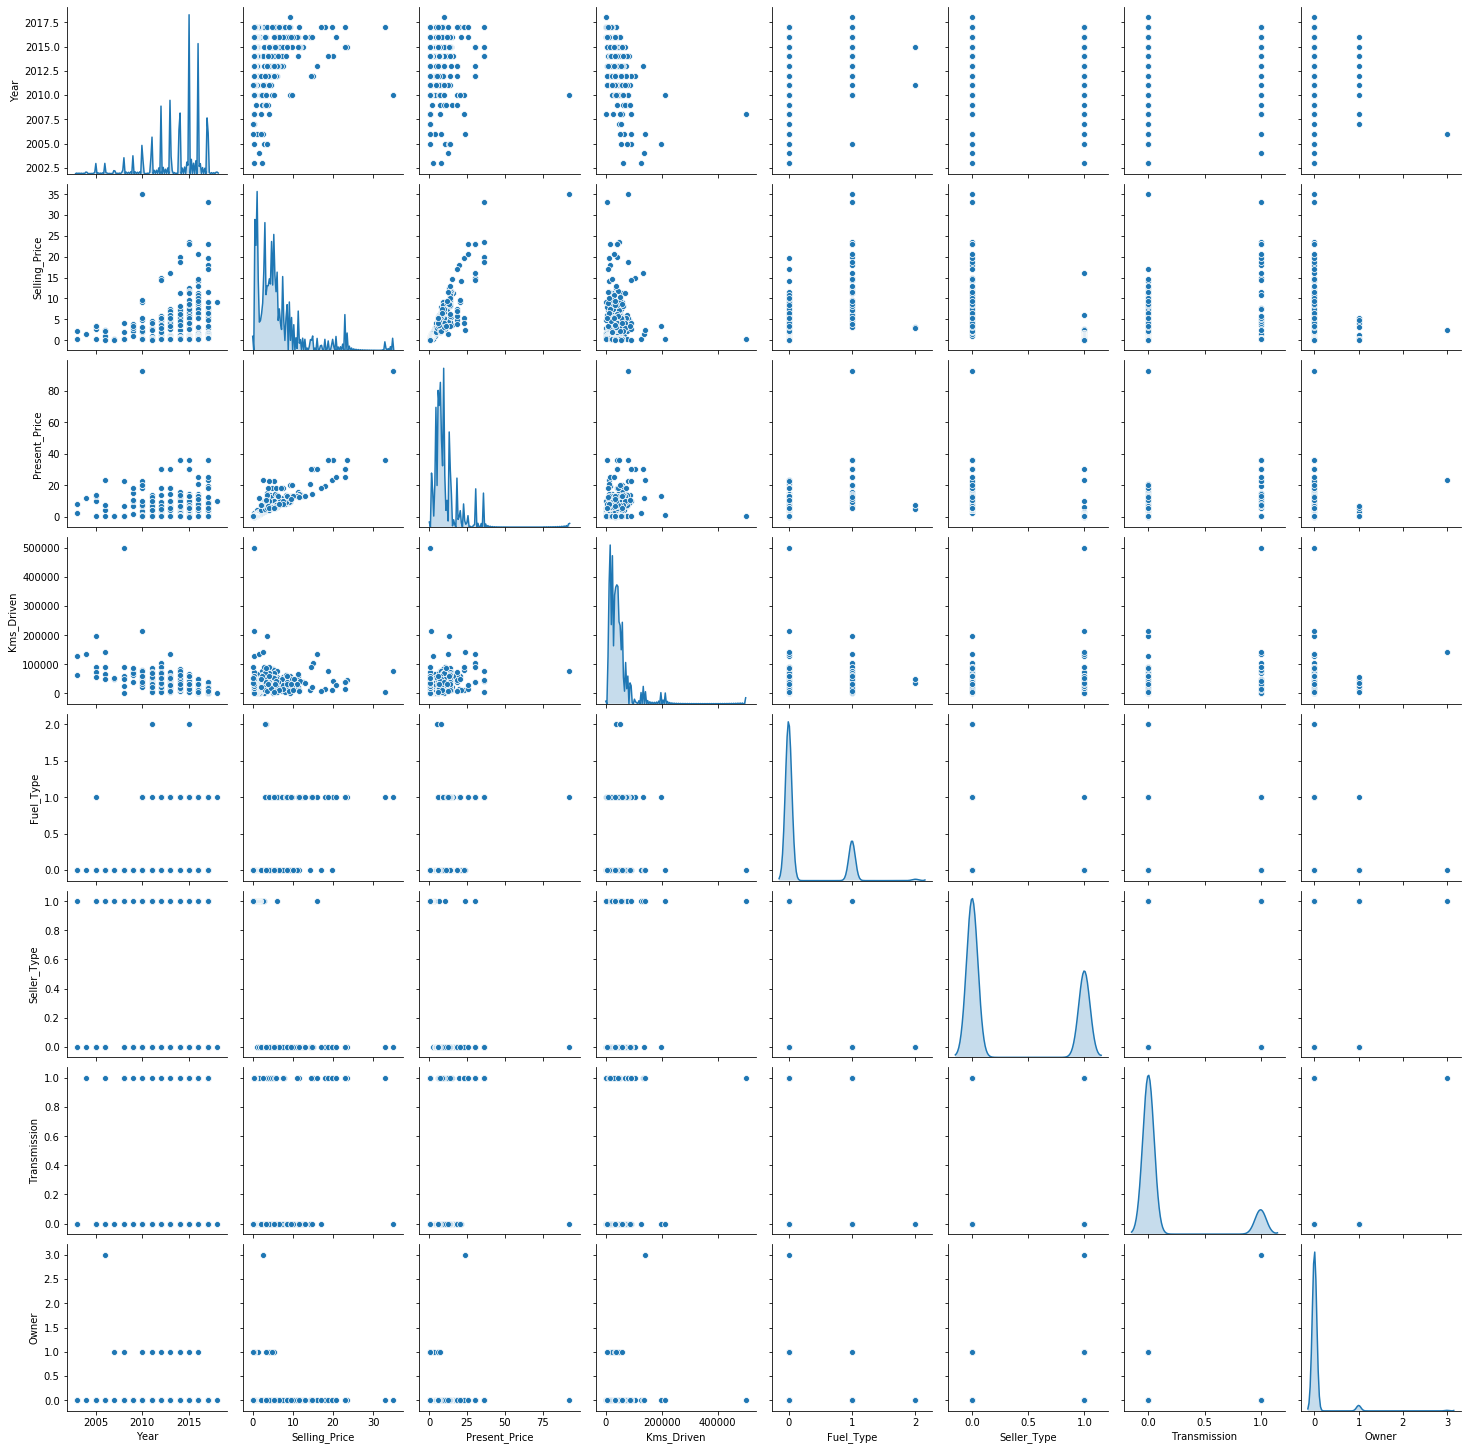

In [10]:
sns.pairplot(data,diag_kind='kde', diag_kws=dict(shade=True, bw=.05, vertical=False))
plt.show()

Lets examine some correlations of the data

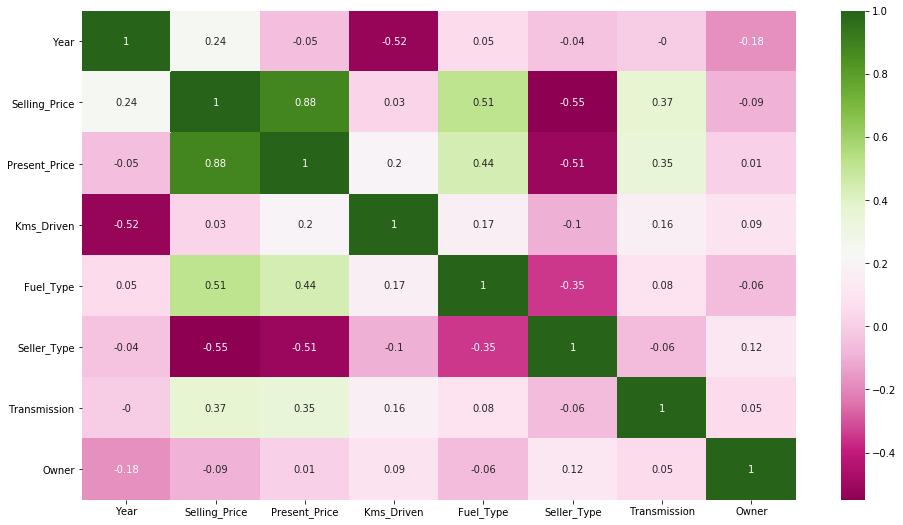

In [11]:
fig, ax = plt.subplots(figsize=(16,9))
correlation_matrix = data.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True, ax=ax,cmap='PiYG')

# Training Our Model

First lets Seperate Selling price from the data and drop unnecessary features

In [12]:
y = data.Selling_Price
X = data.drop(["Selling_Price","Car_Name"], axis=1)

Splitting data into trainng and testing sizes.

In [13]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

Training our Model

In [14]:
Lr = LinearRegression(normalize=True)
Lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

Now we predict Selling Price on Our test data

In [15]:
y_pred = Lr.predict(X_test)
y_pred_ = pd.DataFrame(y_pred)

Now compare the actual output values for X_test with the predicted values

In [16]:
df = pd.DataFrame({'Actual': y_test, 'Predicted':y_pred})
df

,Actual,Predicted
285,7.40,7.903067
248,4.00,2.971195
150,0.50,-0.631461
217,3.15,4.238703
107,1.25,0.469797
...,...,...
62,18.75,20.437660
154,0.50,0.652970
218,6.45,5.443340
286,5.65,5.706884


We see Graphical comparison for our predicted and original values

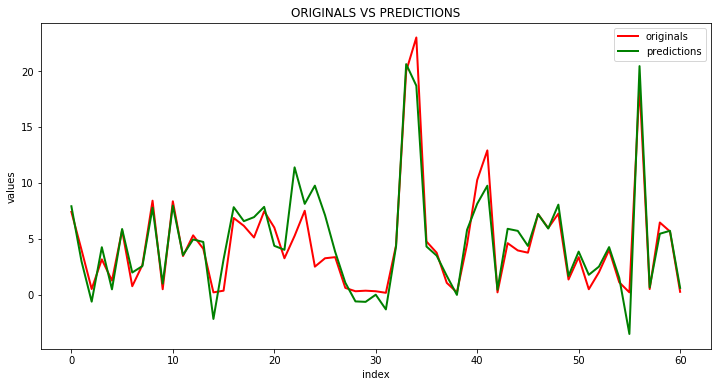

In [17]:
test_index=y_test.reset_index()["Selling_Price"]
ax=test_index.plot(label="originals",figsize=(12,6),linewidth=2,color="r")
ax=y_pred_[0].plot(label = "predictions",figsize=(12,6),linewidth=2,color="g")
plt.legend(loc='upper right')
plt.title("ORIGINALS VS PREDICTIONS")
plt.xlabel("index")
plt.ylabel("values")
plt.show()

# Scoring our Model

we check how much accurate is our model

In [18]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 1.153004591615899
Root Mean Squared Error: 1.8131867211393025


rmse is 1.81 which is about 39% of the selling price meaning our model
is not very accurate but can give reasonable predictions

r_2 Score is

In [19]:
print('r_2 score:', r2_score(y_test, y_pred))

r_2 score: 0.8484549412090353
